## **FACE MASK DETECTION PROJECT USING YOLOv7**

- The aim of this project is to create a model to detect people wearing masks, not wearing masks or wearing masks incorrectly.

- This dataset contains 853 images belonging to the 3 classes, which I will divide into train, validation and test.

- It also contains its bounding boxes in PASCAL VOC XML format, so it is necessary to convert it to YOLO format.

- The classes are:

    - With mask
    - Without mask
    - Mask weared incorrectly

- Data Source: https://www.kaggle.com/datasets/andrewmvd/face-mask-detection/data

### Import Packages

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xml.etree.cElementTree as ET
import glob
import os
import json
import random
import shutil

from PIL import Image, ImageOps

### PASCAL VOC XML to YOLO conversion

The xml_to_yolo_bbox function takes a bounding box (bbox) in XML format and converts it into a YOLO format. Bounding boxes are rectangles that enclose a region of interest within an image, commonly used in object detection tasks.

In [26]:
def xml_to_yolo_bbox(bbox, w, h):

    x_center = ((bbox[2] + bbox[0]) / 2) / w
    y_center = ((bbox[3] + bbox[1]) / 2) / h
    width = (bbox[2] - bbox[0]) / w
    height = (bbox[3] - bbox[1]) / h
    return [x_center, y_center, width, height]

In [ ]:
def yolo_to_xml_bbox(bbox, w, h):
    # x_center, y_center, width, height
    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2

    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)

    return [xmin, ymin, xmax, ymax]

classes = []

input_dir = "/content/ObjectDetection_Yolov7/kaggle/annotations"
output_dir = "/content/ObjectDetection_Yolov7/kaggle/labels"
image_dir = "/content/ObjectDetection_Yolov7/kaggle/images"

os.mkdir(output_dir)

if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

import glob

files = glob.glob(os.path.join(input_dir, "*.xml"))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(image_dir, f"{filename}.png")):
        print(f"{filename} image does not exist!")
        continue

    result = []

    # analyse the content of the xml file
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall("object"):
        label = obj.find("name").text

        # search for new classes and add them to the list
        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)

        # convert data into strings
        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:
        # generate a text file in yolo format for each xml file
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding = "utf-8") as f:
            f.write("\n".join(result))

# generate the class file as a reference
with open("/content/ObjectDetection_Yolov7/kaggle/classes.txt", "w", encoding = "utf-8") as f:
    f.write(json.dumps(classes))

- Classes

In [28]:
with open('/content/ObjectDetection_Yolov7/kaggle/classes.txt') as f:
    contents = f.read()
    print(contents)

["with_mask", "without_mask", "mask_weared_incorrect"]


### Create the Dataset

In [ ]:
os.mkdir("/content/ObjectDetection_Yolov7/kaggle/data")
os.mkdir('/content/ObjectDetection_Yolov7/kaggle/data/train')
os.mkdir('/content/ObjectDetection_Yolov7/kaggle/data/val')
os.mkdir('/content/ObjectDetection_Yolov7/kaggle/data/test')
os.mkdir('/content/ObjectDetection_Yolov7/kaggle/data/train/images')
os.mkdir('/content/ObjectDetection_Yolov7/kaggle/data/train/labels')
os.mkdir('/content/ObjectDetection_Yolov7/kaggle/data/test/images')
os.mkdir('/content/ObjectDetection_Yolov7/kaggle/data/test/labels')
os.mkdir('/content/ObjectDetection_Yolov7/kaggle/data/val/images')
os.mkdir('/content/ObjectDetection_Yolov7/kaggle/data/val/labels')

In [29]:
content = []

for i in os.listdir("/content/ObjectDetection_Yolov7/kaggle/images"):
    srt = i[:-4]
    content.append(srt)

print('Size', len(content))

Size 853


### Splitting the Dataset into Train, Validation and Test

In [30]:
def preparinbdata(main_txt_file, main_img_file, train_size, test_size, val_size):

    for i in range(0,train_size):

        source_txt = main_txt_file + "/" + content[i] + ".txt"
        source_img = main_img_file + "/" + content[i] + ".png"

        mstring = content[i]
        train_destination_txt = "/content/ObjectDetection_Yolov7/kaggle/data/train/labels" + "/" + content[i] + ".txt"
        train_destination_png = "/content/ObjectDetection_Yolov7/kaggle/data/train/images" + "/" + content[i] + ".png"

        shutil.copy(source_txt, train_destination_txt)
        shutil.copy(source_img, train_destination_png)




    for l in range(train_size , train_size + test_size):

        source_txt = main_txt_file + "/" + content[l] + ".txt"
        source_img = main_img_file + "/" + content[l] + ".png"

        mstring = content[l]
        test_destination_txt = "/content/ObjectDetection_Yolov7/kaggle/data/test/labels" + "/" + content[l] + ".txt"
        test_destination_png = "/content/ObjectDetection_Yolov7/kaggle/data/test/images" + "/" + content[l] + ".png"

        shutil.copy(source_txt, test_destination_txt)
        shutil.copy(source_img, test_destination_png)




    for n in range(train_size + test_size , train_size + test_size + val_size):

        source_txt = main_txt_file + "/" + content[n] + ".txt"
        source_img = main_img_file + "/" + content[n] + ".png"

        mstring = content[n]
        val_destination_txt = "/content/ObjectDetection_Yolov7/kaggle/data/val/labels" + "/" + content[n] + ".txt"
        val_destination_png = "/content/ObjectDetection_Yolov7/kaggle/data/val/images" + "/" + content[n] + ".png"

        shutil.copy(source_txt, val_destination_txt)
        shutil.copy(source_img, val_destination_png)



In [34]:
preparinbdata("/content/ObjectDetection_Yolov7/kaggle/labels", "/content/ObjectDetection_Yolov7/kaggle/images", 603, 105, 100) # train, test, val

### Configure Yaml File

In [32]:
%cd /content/ObjectDetection_Yolov7/kaggle/data

yaml_text = """train: ObjectDetection_Yolov7/kaggle/data/train/images
val: ObjectDetection_Yolov7/kaggle/data/val/images

nc: 3
names: ["without_mask", "with_mask", "mask_weared_incorrect"]"""

with open("/content/ObjectDetection_Yolov7/kaggle/data.yaml", 'w') as file:
    file.write(yaml_text)

%cat /content/ObjectDetection_Yolov7/kaggle/data.yaml

/content/ObjectDetection_Yolov7/kaggle/data
train: ObjectDetection_Yolov7/kaggle/data/train/images
val: ObjectDetection_Yolov7/kaggle/data/val/images

nc: 3
names: ["without_mask", "with_mask", "mask_weared_incorrect"]

### Clone Git Repository

In [ ]:
%cd /content/ObjectDetection_Yolov7
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!ls

### Get Weights

In [ ]:
wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

### Train the Model

In [33]:
!python /content/ObjectDetection_Yolov7/yolov7/train.py --workers 8 --batch-size 16 --epochs 50 --data /content/ObjectDetection_Yolov7/kaggle/data.yaml  --cfg /content/ObjectDetection_Yolov7/yolov7/cfg/training/yolov7.yaml --weights '' --name yolov7_1 --hyp /content/ObjectDetection_Yolov7/yolov7/data/hyp.scratch.p5.yaml

2024-05-18 19:41:23.020135: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 19:41:23.020188: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 19:41:23.021545: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-18 19:41:23.028645: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 19:41:24.093090: W tensorflow/compiler/tf2

### Check Results

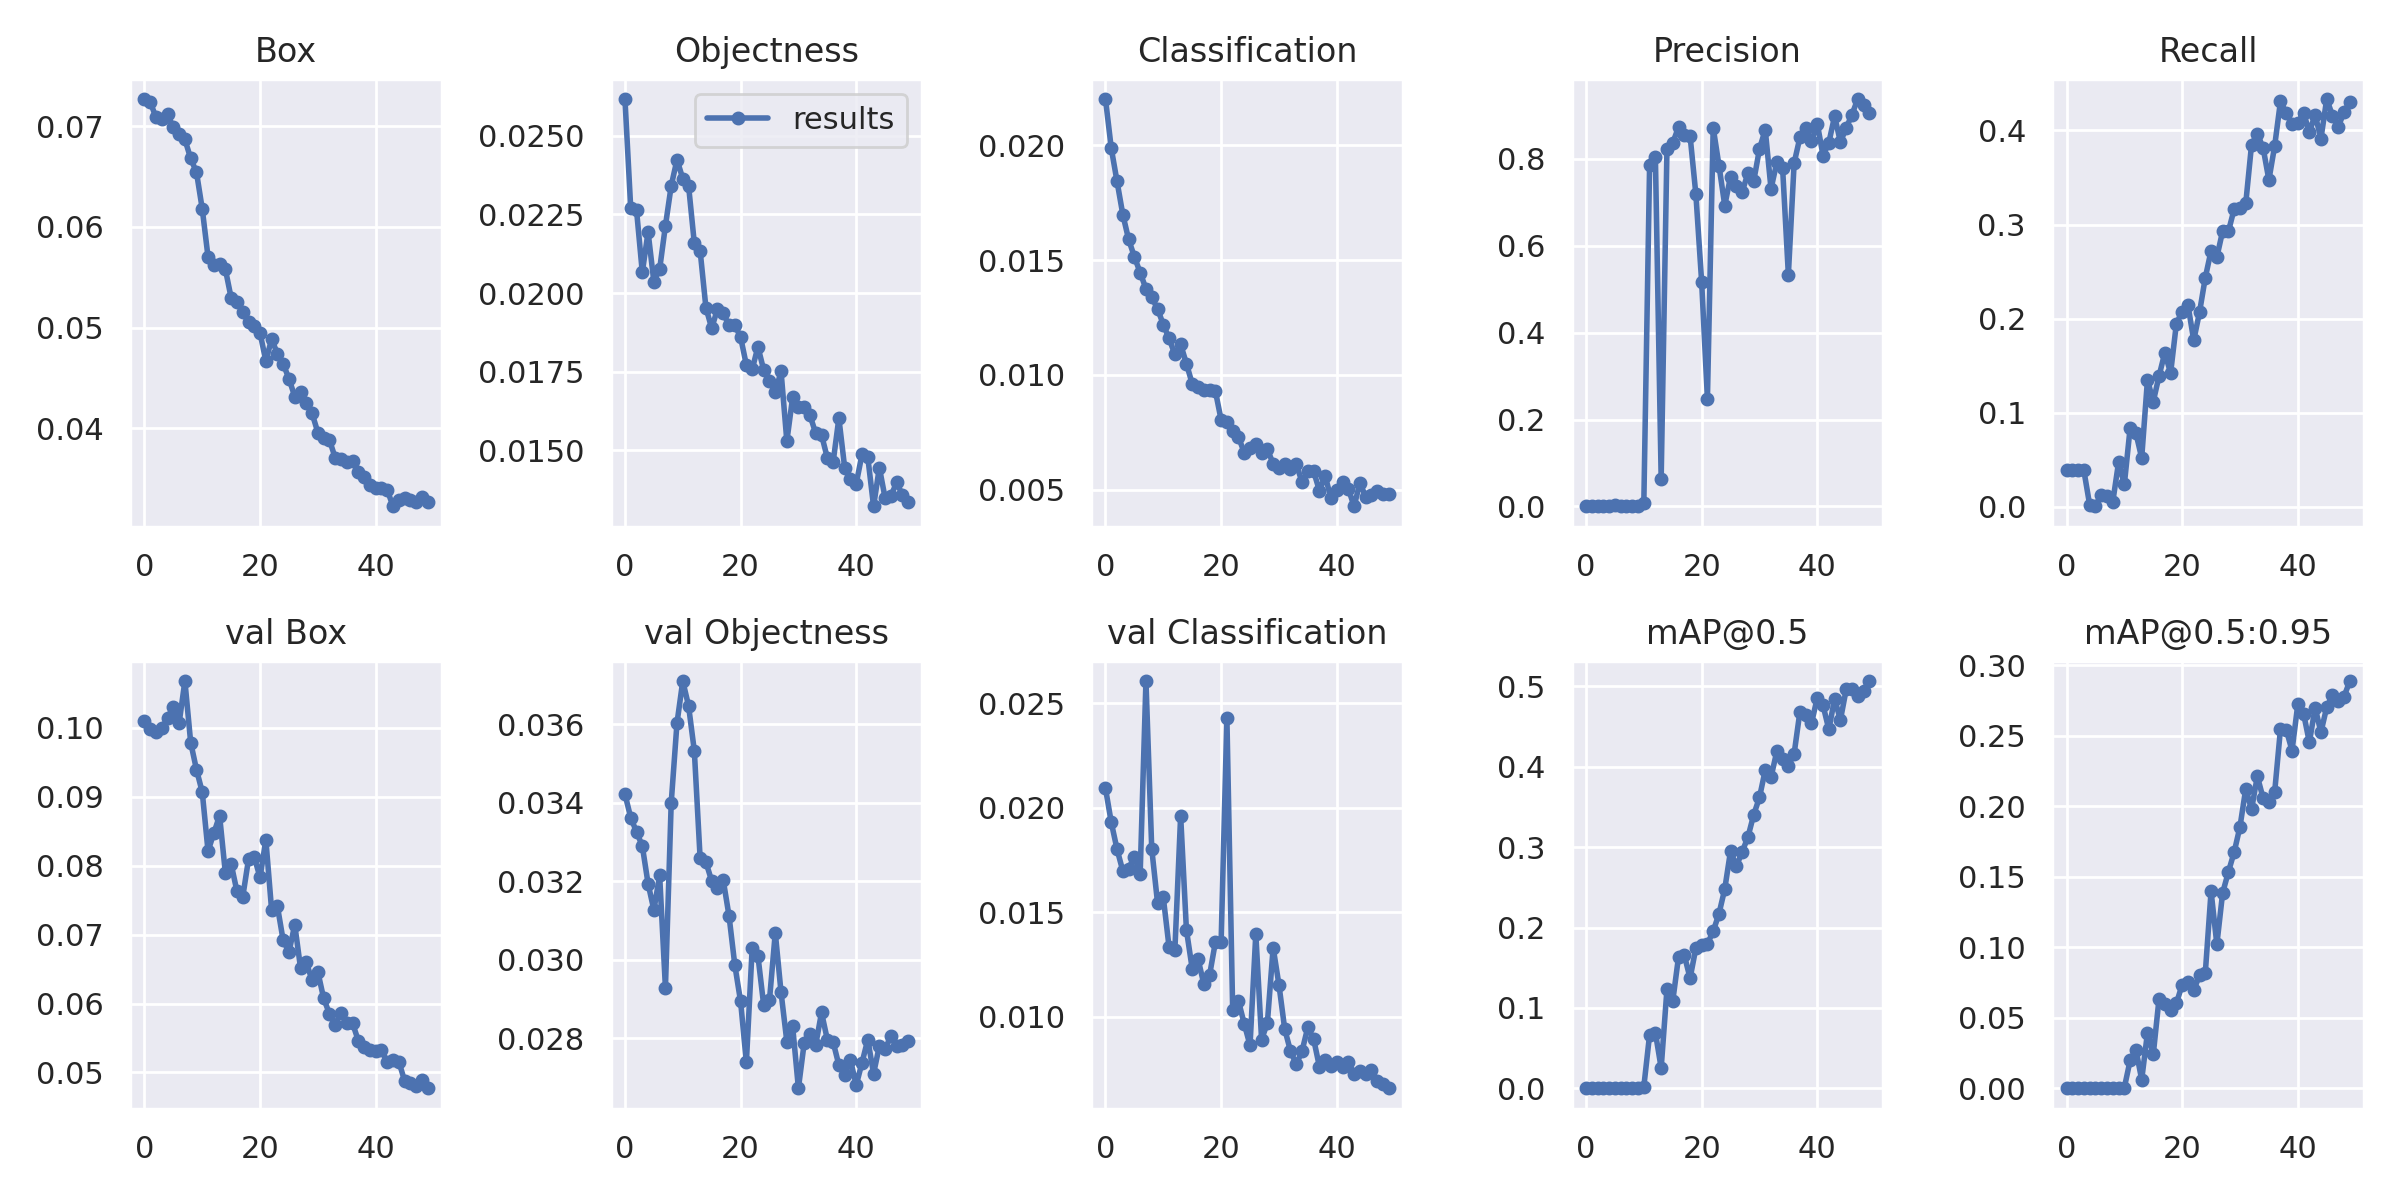

In [35]:
Image.open("/content/ObjectDetection_Yolov7/kaggle/data/runs/train/yolov7_1/results.png")

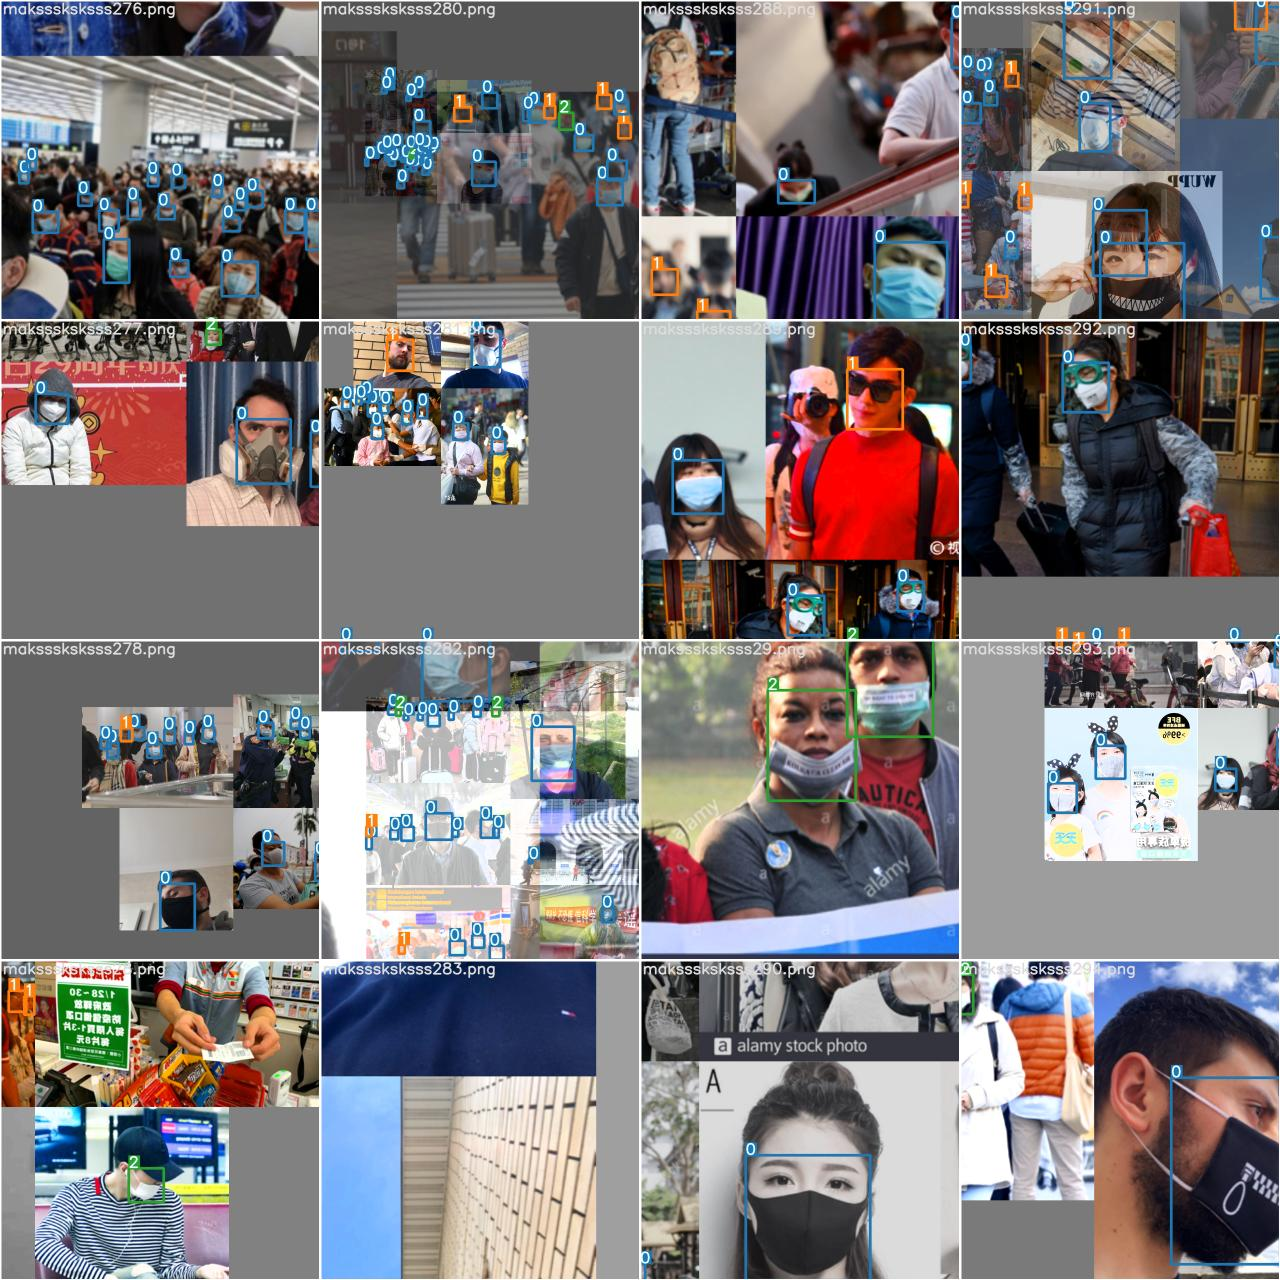

In [40]:
Image.open("/content/ObjectDetection_Yolov7/kaggle/data/runs/train/yolov7_1/train_batch9.jpg")

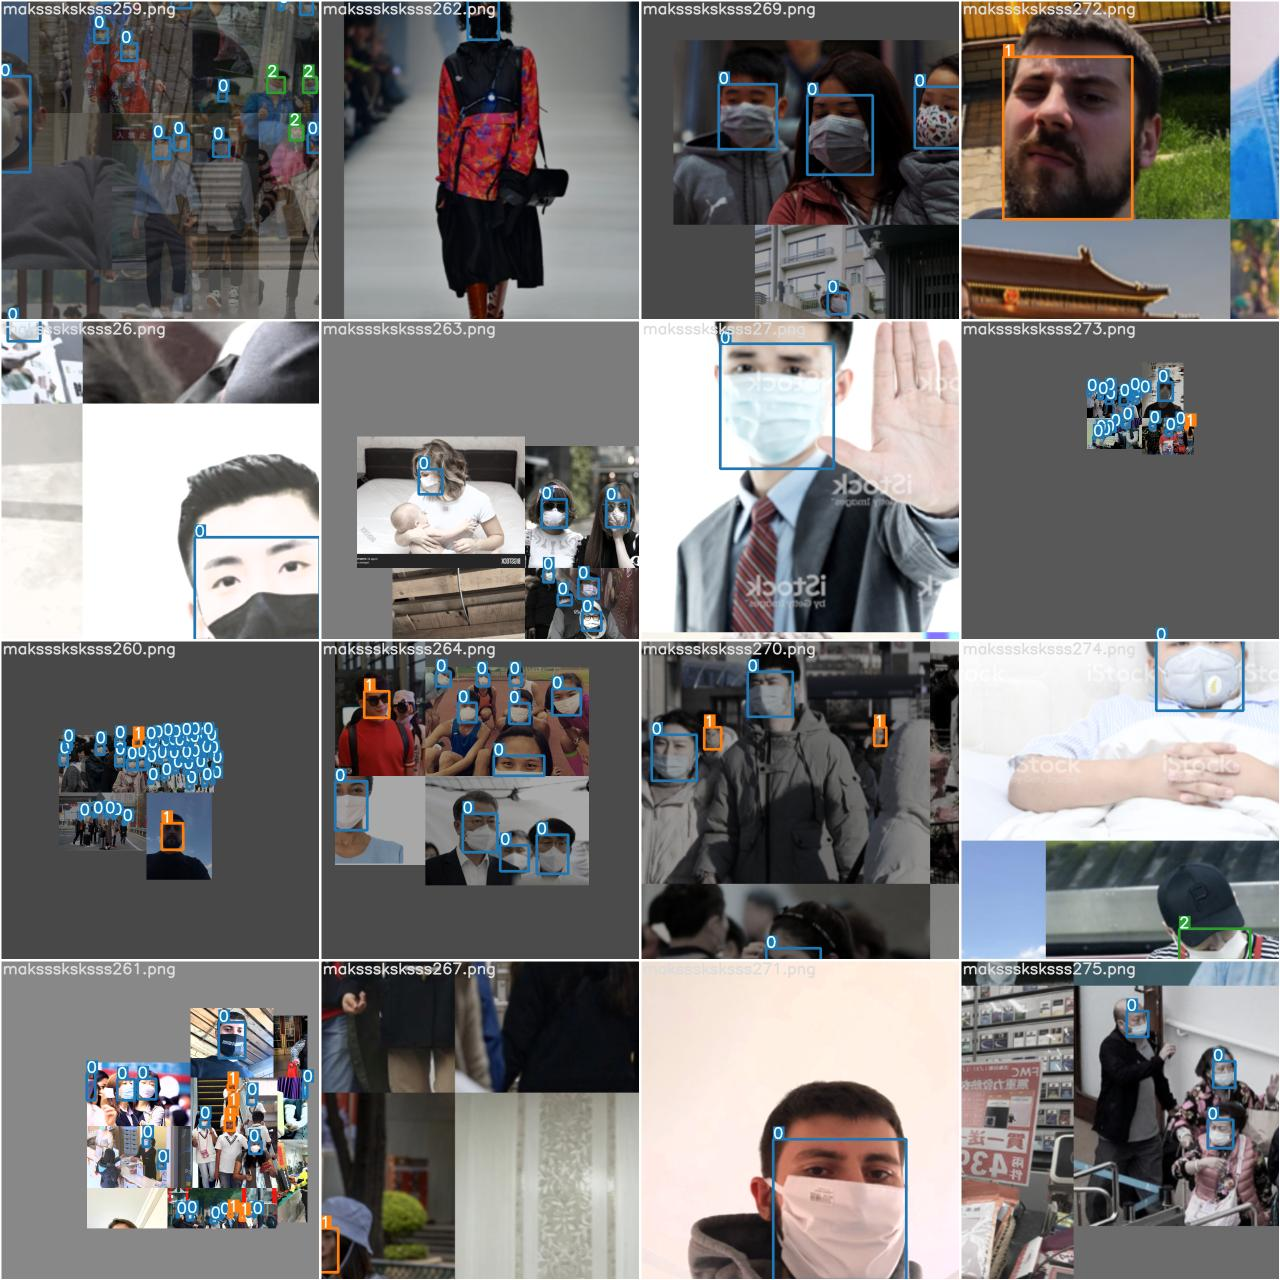

In [41]:
Image.open("/content/ObjectDetection_Yolov7/kaggle/data/runs/train/yolov7_1/train_batch8.jpg")

------------------